# Environment Setup

In [174]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import sklearn as sk
import seaborn as sns
from itertools import repeat


# Data Loading

In [175]:
_df = pd.read_csv("./input/dummy_df.csv", index_col=0)
_df

,year,artist.inverted,track,time,date.entered,date.peaked,week,rank,gap_week,total_time_s,...,date.peaked.quarter,genre_Electronica,genre_Gospel,genre_Jazz,genre_Latin,genre_Pop,genre_R&B,genre_Rap,genre_Reggae,genre_Rock
0,2000,Destiny's Child,Independent Women Part I,3:38,2000-09-23,2000-11-18,1,78,False,218,...,4,0,0,0,0,0,0,0,0,1
317,2000,Destiny's Child,Independent Women Part I,3:38,2000-09-23,2000-11-18,2,63,False,218,...,4,0,0,0,0,0,0,0,0,1
634,2000,Destiny's Child,Independent Women Part I,3:38,2000-09-23,2000-11-18,3,49,False,218,...,4,0,0,0,0,0,0,0,0,1
951,2000,Destiny's Child,Independent Women Part I,3:38,2000-09-23,2000-11-18,4,33,False,218,...,4,0,0,0,0,0,0,0,0,1
1268,2000,Destiny's Child,Independent Women Part I,3:38,2000-09-23,2000-11-18,5,23,False,218,...,4,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
314,2000,Zombie Nation,Kernkraft 400,3:30,2000-09-02,2000-09-02,1,99,False,210,...,3,0,0,0,0,0,0,0,0,1
631,2000,Zombie Nation,Kernkraft 400,3:30,2000-09-02,2000-09-02,2,99,False,210,...,3,0,0,0,0,0,0,0,0,1
315,2000,The Eastsidaz,Got Beef,3:58,2000-07-01,2000-07-01,1,99,False,238,...,3,0,0,0,0,0,0,1,0,0
632,2000,The Eastsidaz,Got Beef,3:58,2000-07-01,2000-07-01,2,99,False,238,...,3,0,0,0,0,0,0,1,0,0


In [176]:
_df.columns

Index(['year', 'artist.inverted', 'track', 'time', 'date.entered',
       'date.peaked', 'week', 'rank', 'gap_week', 'total_time_s',
       'date.entered.year', 'date.entered.month', 'date.entered.day',
       'date.entered.quarter', 'date.peaked.year', 'date.peaked.month',
       'date.peaked.day', 'date.peaked.quarter', 'genre_Electronica',
       'genre_Gospel', 'genre_Jazz', 'genre_Latin', 'genre_Pop', 'genre_R&B',
       'genre_Rap', 'genre_Reggae', 'genre_Rock'],
      dtype='object')

# Supervised Learning - Linear Regression

## Outliers

In [177]:
reg_df = _df[['total_time_s', 'rank']]
reg_df

,total_time_s,rank
0,218,78
317,218,63
634,218,49
951,218,33
1268,218,23
...,...,...
314,210,99
631,210,99
315,238,99
632,238,99


In [178]:
reg_df.boxplot()

<Axes: >

In [179]:
_25p = reg_df['total_time_s'].quantile(.25)
_75p = reg_df['total_time_s'].quantile(.75)
_iqr = _75p - _25p
_out_range = 1.5 * _iqr

In [180]:
print( _25p, _75p, _iqr, _out_range)

220.0 257.0 37.0 55.5


In [181]:
_bottom_limit = _25p - _out_range
_top_limit = _75p + _out_range
print (_bottom_limit, _top_limit)

164.5 312.5


In [182]:
out_reg_df = reg_df[(reg_df['total_time_s']<=_top_limit) & (reg_df['total_time_s']>=_bottom_limit)]

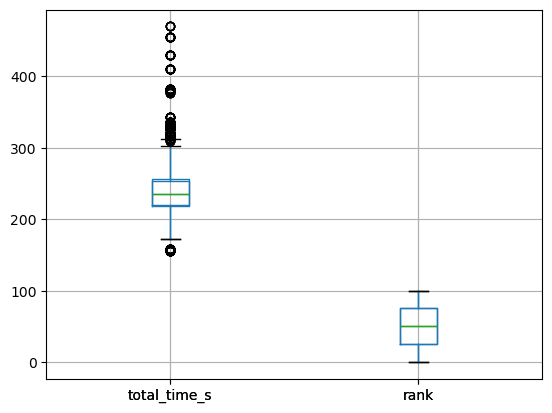

In [183]:
out_reg_df.boxplot()
plt.show()

## Features and Target Split

In [184]:
X = out_reg_df.drop(columns=['rank'])
y = out_reg_df[['rank']]

## Scaling

### Features

In [185]:
from sklearn.preprocessing import StandardScaler

features_standard_scaler = StandardScaler().fit(X).set_output(transform='pandas')
features_scale_df = features_standard_scaler.transform(X)
features_scale_df

,total_time_s
0,-0.644739
317,-0.644739
634,-0.644739
951,-0.644739
1268,-0.644739
...,...
314,-0.941175
631,-0.941175
315,0.096351
632,0.096351


### Target

In [186]:
target_standard_scaler = StandardScaler().fit(y).set_output(transform='pandas')
target_scale_df = target_standard_scaler.transform(y)
target_scale_df

,rank
0,0.932877
317,0.421702
634,-0.055395
951,-0.600648
1268,-0.941431
...,...
314,1.648522
631,1.648522
315,1.648522
632,1.648522


## Train-Test-Split

In [187]:
X_train, X_test, y_train, y_test = sk.model_selection.train_test_split(features_scale_df, target_scale_df, train_size=0.8, test_size=0.2)

In [188]:
X_train

,total_time_s
1790,0.466896
3892,-0.385358
3678,0.503950
2283,0.059296
10790,0.207514
...,...
3676,0.800386
4802,0.800386
2589,1.282095
718,-0.533576


In [189]:
y_train

,rank
1790,0.387624
3892,-0.873275
3678,1.341817
2283,-1.009588
10790,-0.805118
...,...
3676,1.409974
4802,-1.145901
2589,-0.975510
718,0.387624


In [190]:
X_test

,total_time_s
927,0.244569
3027,1.689694
2788,0.392787
1518,0.022242
3675,-0.607685
...,...
2656,-0.941175
5078,1.319149
3204,-0.348303
2675,0.911550


In [191]:
y_test

,rank
927,1.409974
3027,1.341817
2788,0.966956
1518,1.375896
3675,0.387624
...,...
2656,-0.464335
5078,-1.657076
3204,-1.418528
2675,-0.191708


## Model Execution

In [192]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X_train, y_train)

In [193]:
_pred = reg.predict(X_test)

In [194]:
_pred

array([[-2.33874654e-04],
       [-4.16185228e-03],
       [-6.36744154e-04],
       [ 3.70429596e-04],
       [ 2.08262497e-03],
       [ 5.71864346e-04],
       [ 1.47832072e-03],
       [-3.85970015e-03],
       [-3.15467853e-03],
       [ 5.71864346e-04],
       [ 3.49266822e-03],
       [-5.77333028e-03],
       [-2.85252640e-03],
       [ 2.78764660e-03],
       [-2.04678740e-03],
       [ 8.74016471e-04],
       [ 3.70429596e-04],
       [ 1.37760335e-03],
       [-2.04678740e-03],
       [ 2.38477710e-03],
       [ 2.68692922e-03],
       [-1.24104840e-03],
       [ 3.29123347e-03],
       [-2.65109165e-03],
       [ 7.73299096e-04],
       [ 1.37760335e-03],
       [ 6.21203735e-03],
       [-1.24104840e-03],
       [ 1.98190760e-03],
       [ 5.71864346e-04],
       [ 1.37760335e-03],
       [-2.34893953e-03],
       [-1.34176578e-03],
       [ 3.39195085e-03],
       [-1.24104840e-03],
       [-2.44965690e-03],
       [ 4.19768985e-03],
       [-4.35309404e-04],
       [ 2.9

In [195]:
reg.coef_

array([[-0.00271809]])

In [196]:
reg.get_params()

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}

In [197]:
reg.score(X_test, y_test)

0.00010287411582798889

### Performance Checking

In [198]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, _pred)

0.984296537856978

In [199]:
np.sqrt(mean_squared_error(y_test, _pred))

0.992117199657872

In [200]:
from sklearn.metrics import r2_score

r2_score(y_test, _pred)

0.00010287411582798889

In [201]:
target_pred_df = target_standard_scaler.inverse_transform(_pred)
target_test_df = target_standard_scaler.inverse_transform(y_test)

In [202]:
target_pred_df

array([[50.6186424 ],
       [50.50337922],
       [50.60682054],
       [50.6363752 ],
       [50.68661812],
       [50.64228613],
       [50.66888533],
       [50.51224561],
       [50.53293388],
       [50.64228613],
       [50.72799465],
       [50.45609176],
       [50.54180028],
       [50.70730639],
       [50.56544401],
       [50.65115253],
       [50.6363752 ],
       [50.66592986],
       [50.56544401],
       [50.69548452],
       [50.70435092],
       [50.58908774],
       [50.72208372],
       [50.54771121],
       [50.64819706],
       [50.66592986],
       [50.80779224],
       [50.58908774],
       [50.68366266],
       [50.64228613],
       [50.66592986],
       [50.55657761],
       [50.58613227],
       [50.72503919],
       [50.58908774],
       [50.55362214],
       [50.74868292],
       [50.61273147],
       [50.71321732],
       [50.65115253],
       [50.55657761],
       [50.53588934],
       [50.64228613],
       [50.61568693],
       [50.43835896],
       [50

In [203]:
np.sqrt(mean_squared_error(target_pred_df, target_test_df))

29.112840982007366

In [204]:
r2_score(target_pred_df, target_test_df)

-132261.25267203338

# Supervised Learning - Classification: Logistic Regression

In [205]:
_df.columns

Index(['year', 'artist.inverted', 'track', 'time', 'date.entered',
       'date.peaked', 'week', 'rank', 'gap_week', 'total_time_s',
       'date.entered.year', 'date.entered.month', 'date.entered.day',
       'date.entered.quarter', 'date.peaked.year', 'date.peaked.month',
       'date.peaked.day', 'date.peaked.quarter', 'genre_Electronica',
       'genre_Gospel', 'genre_Jazz', 'genre_Latin', 'genre_Pop', 'genre_R&B',
       'genre_Rap', 'genre_Reggae', 'genre_Rock'],
      dtype='object')

In [206]:
reg_df['genre_Rock'] = _df['genre_Rock'].copy()
reg_df = reg_df.drop(columns='rank').copy()
reg_df

/var/folders/42/klv0xnk11nj2hh0wkk702nkh0000gn/T/ipykernel_8290/1933982530.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reg_df['genre_Rock'] = _df['genre_Rock'].copy()


,total_time_s,genre_Rock
0,218,1
317,218,1
634,218,1
951,218,1
1268,218,1
...,...,...
314,210,1
631,210,1
315,238,0
632,238,0


## Outliers

In [207]:
out_logreg_df = reg_df[(reg_df['total_time_s']<=_top_limit) & (reg_df['total_time_s']>=_bottom_limit)]

In [208]:
out_logreg_df

,total_time_s,genre_Rock
0,218,1
317,218,1
634,218,1
951,218,1
1268,218,1
...,...,...
314,210,1
631,210,1
315,238,0
632,238,0


## Label Distribution

In [209]:
out_logreg_df['genre_Rock'].value_counts()

genre_Rock
0    2527
1    2421
Name: count, dtype: int64

In [210]:
out_logreg_df['genre_Rock'].shape

(4948,)

In [211]:
out_logreg_df['total_time_s'].nunique()

105

### Resampling

#### Samples

##### Sample DataFrame

In [212]:
resampling_df_sample = pd.DataFrame()
resampling_df_sample['x1'] = np.random.randint(1, 200, 200)
resampling_df_sample['x2'] = np.random.randint(1, 200, 200)
repeat_list = list(repeat(1, 140))
repeat_list.extend(list(repeat(0, 60)))
resampling_df_sample['y'] = repeat_list
resampling_df_sample

,x1,x2,y
0,158,182,1
1,42,76,1
2,77,104,1
3,100,165,1
4,96,25,1
...,...,...,...
195,5,5,0
196,99,59,0
197,46,72,0
198,122,46,0


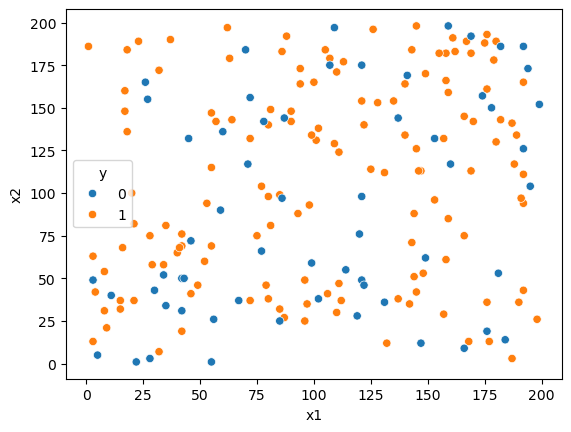

In [213]:
sns.scatterplot(resampling_df_sample, x="x1", y="x2", hue="y")
plt.show()

In [214]:
resampling_df_sample['y'].value_counts()

y
1    140
0     60
Name: count, dtype: int64

##### Bootstrap with Replacement

In [215]:
from sklearn.utils import resample
bootstrap_df_sample = resample(resampling_df_sample[resampling_df_sample['y']==0], replace=True, n_samples=140)
bootstrap_df_sample

,x1,x2,y
161,45,132,0
141,30,43,0
144,55,1,0
155,60,136,0
140,59,90,0
...,...,...,...
198,122,46,0
157,3,49,0
182,194,173,0
155,60,136,0


In [216]:
bootstrap_df_sample = pd.concat([bootstrap_df_sample, resampling_df_sample[resampling_df_sample['y']==1]])
bootstrap_df_sample

,x1,x2,y
161,45,132,0
141,30,43,0
144,55,1,0
155,60,136,0
140,59,90,0
...,...,...,...
135,191,97,1
136,145,126,1
137,88,192,1
138,80,38,1


In [217]:
bootstrap_df_sample['y'].value_counts()

y
0    140
1    140
Name: count, dtype: int64

In [218]:
bootstrap_df_sample['y'].value_counts()

y
0    140
1    140
Name: count, dtype: int64

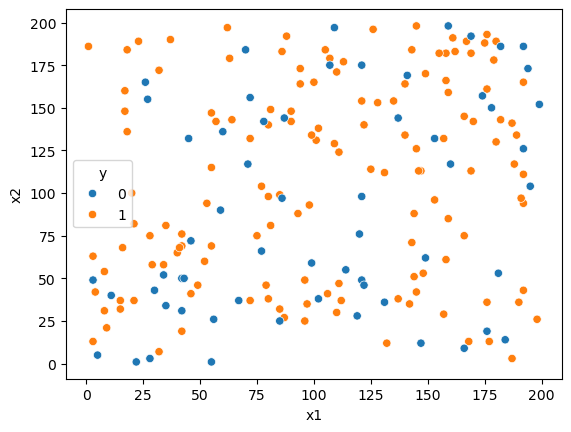

In [219]:
sns.scatterplot(resampling_df_sample, x="x1", y="x2", hue="y")
plt.show()

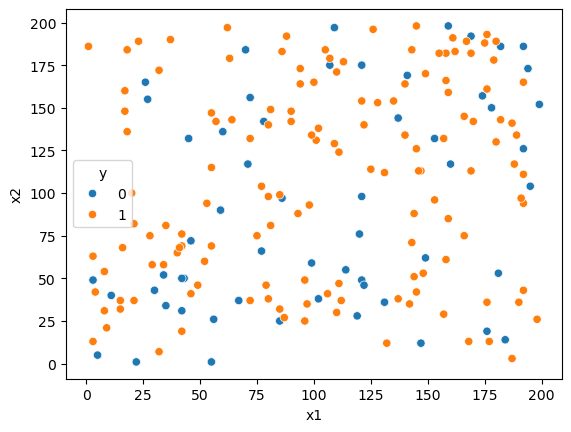

In [220]:
sns.scatterplot(bootstrap_df_sample, x="x1", y="x2", hue="y")
plt.show()

##### SMOTE

In [221]:
from imblearn.over_sampling import SMOTE
X, y = SMOTE(random_state=1).fit_resample(X= resampling_df_sample[['x1', 'x2']], y=resampling_df_sample[['y']])


In [222]:
y.value_counts()

y
0    140
1    140
Name: count, dtype: int64

In [223]:
X.nunique()

x1    144
x2    142
dtype: int64

In [224]:
X

,x1,x2
0,158,182
1,42,76
2,77,104
3,100,165
4,96,25
...,...,...
275,68,111
276,71,139
277,114,55
278,70,174


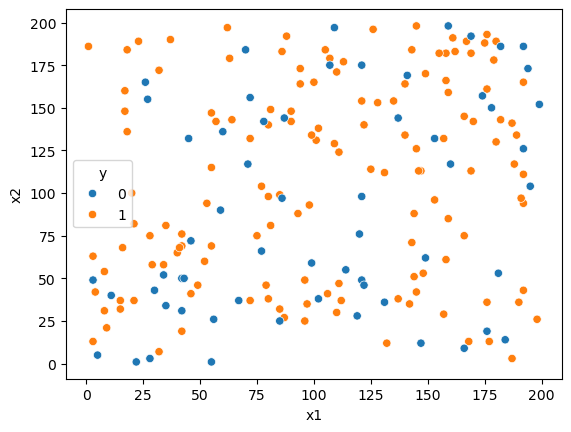

In [225]:
sns.scatterplot(resampling_df_sample, x="x1", y="x2", hue="y")
plt.show()

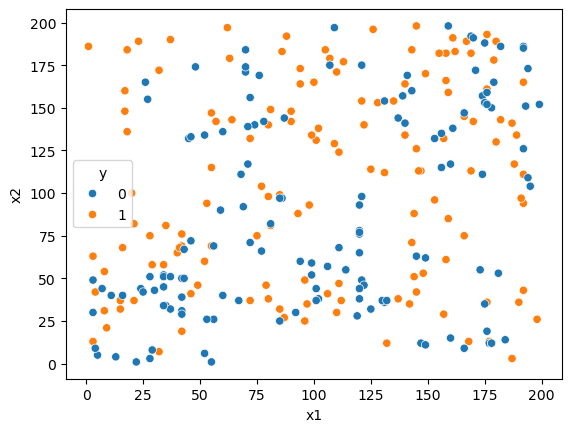

In [226]:
smote_df_sample = X.join(y)
sns.scatterplot(smote_df_sample, x="x1", y="x2", hue="y")
plt.show()

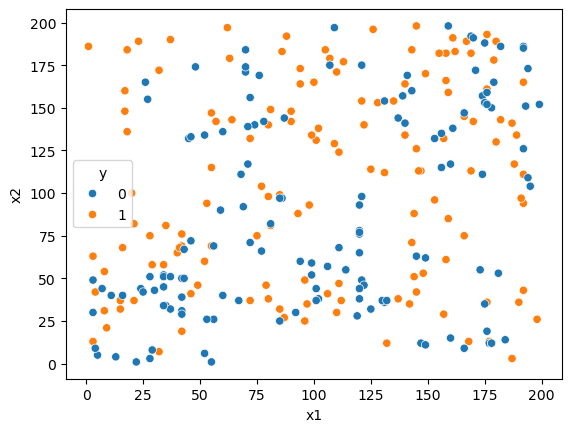

In [227]:
scat_df=X.join(y)
sns.scatterplot(scat_df, x='x1', y = 'x2', hue="y")
plt.show()

#### Actual
- Bootstrap Resampling with Replacement

In [228]:
from sklearn.utils import resample
resample_df = resample(out_logreg_df[out_logreg_df['genre_Rock']==1], replace=True, n_samples=2527)

In [229]:
resample_df['genre_Rock'].value_counts()

genre_Rock
1    2527
Name: count, dtype: int64

In [230]:
logreg_df = pd.concat([out_logreg_df[out_logreg_df['genre_Rock']!=1], resample_df])
logreg_df

,total_time_s,genre_Rock
7,216,0
324,216,0
641,216,0
958,216,0
1275,216,0
...,...,...
1793,242,1
8890,243,1
2235,254,1
984,199,1


In [231]:
logreg_df['genre_Rock'].value_counts()


genre_Rock
0    2527
1    2527
Name: count, dtype: int64

In [232]:
logreg_df['total_time_s'].nunique()

105

## Train-Test-Split

In [233]:
X_train, X_test, y_train, y_test = sk.model_selection.train_test_split(logreg_df[['total_time_s']], logreg_df[['genre_Rock']], train_size=0.8, test_size=0.2)

In [234]:
X_train

,total_time_s
1423,303
2986,274
5291,252
3312,173
2235,254
...,...
2406,230
3200,195
5258,236
1793,242


In [235]:
y_train

,genre_Rock
1423,0
2986,0
5291,1
3312,0
2235,1
...,...
2406,0
3200,1
5258,1
1793,1


## Model Execution

In [236]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(random_state=0).fit(X_train, y_train)


/opt/anaconda3/envs/DSenvTF/lib/python3.12/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [237]:
logreg.coef_

array([[0.00939492]])

In [238]:
logreg.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'deprecated',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': 0,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [239]:
y_pred = logreg.predict(X_test)

### Performance Checking

In [240]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_pred)

array([[298, 204],
       [223, 286]])

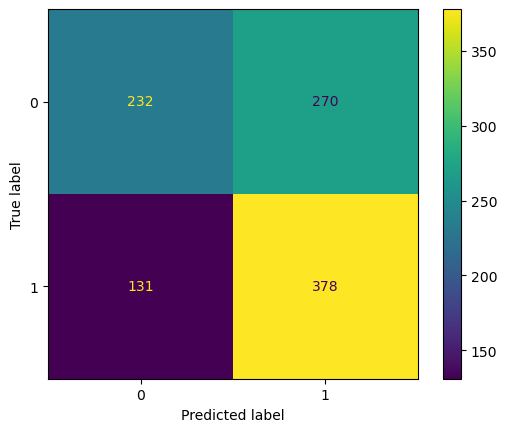

In [249]:
from sklearn.metrics import ConfusionMatrixDisplay

cm_display_logreg = ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred))
cm_display_logreg.plot()
plt.show()



In [242]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

print(f'''
    Accuracy:{accuracy_score(y_pred, y_test)}
    Precision:{precision_score(y_pred, y_test)}
    Recall:{recall_score(y_pred, y_test)}
    F1:{f1_score(y_pred, y_test)}
'''
)


    Accuracy:0.5776458951533135
    Precision:0.5618860510805501
    Recall:0.5836734693877551
    F1:0.5725725725725725



# Other Classification Techniques

## Naive-Bayes

In [250]:
from sklearn.naive_bayes import GaussianNB

nb_clf = GaussianNB().fit(X_train, y_train)
y_pred = nb_clf.predict(X_test)

/opt/anaconda3/envs/DSenvTF/lib/python3.12/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


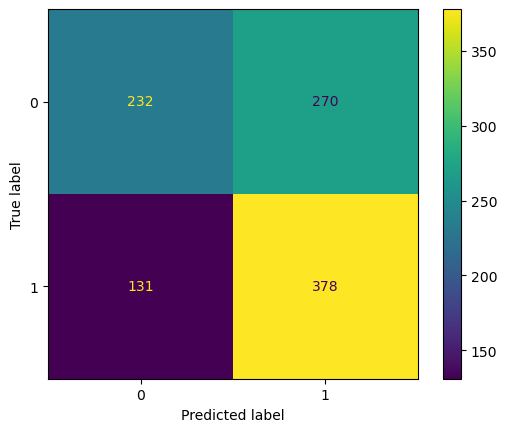


    Accuracy:0.6033630069238378
    Precision:0.7426326129666012
    Recall:0.5833333333333334
    F1:0.6534140017286084



In [253]:
cm_display_nb = ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred))
cm_display_nb.plot()
plt.show()

print(f'''
    Accuracy:{accuracy_score(y_pred, y_test)}
    Precision:{precision_score(y_pred, y_test)}
    Recall:{recall_score(y_pred, y_test)}
    F1:{f1_score(y_pred, y_test)}
'''
)

## K-Nearest Neighbor

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

kn_clf = KNeighborsClassifier(n_neighbors=3).fit(X_train, y_train)
y_pred = kn_clf.predict(X_test)

/opt/anaconda3/envs/DSenvTF/lib/python3.12/site-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


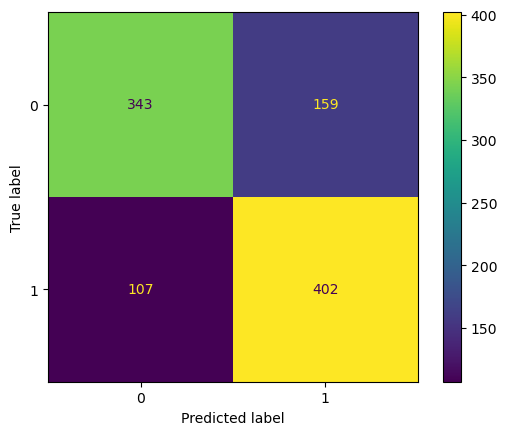


    Accuracy:0.7368941641938674
    Precision:0.7897838899803536
    Recall:0.7165775401069518
    F1:0.7514018691588785



In [256]:
cm_display_nb = ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred))
cm_display_nb.plot()
plt.show()

print(f'''
    Accuracy:{accuracy_score(y_pred, y_test)}
    Precision:{precision_score(y_pred, y_test)}
    Recall:{recall_score(y_pred, y_test)}
    F1:{f1_score(y_pred, y_test)}
'''
)

## Decision Tree

In [258]:
from sklearn.tree import DecisionTreeClassifier

dt_clf = DecisionTreeClassifier(random_state=0).fit(X_train, y_train)
y_pred = dt_clf.predict(X_test)

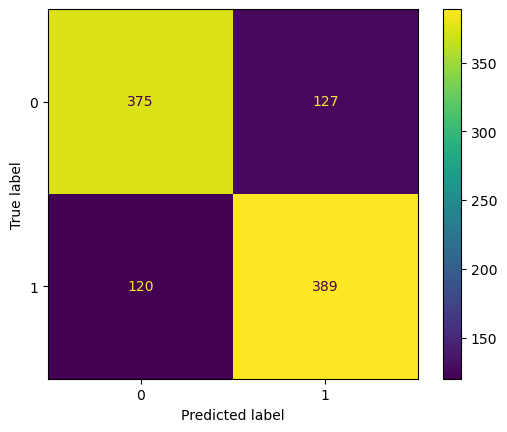


    Accuracy:0.7556874381800198
    Precision:0.7642436149312377
    Recall:0.7538759689922481
    F1:0.7590243902439024



In [259]:
cm_display_nb = ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred))
cm_display_nb.plot()
plt.show()

print(f'''
    Accuracy:{accuracy_score(y_pred, y_test)}
    Precision:{precision_score(y_pred, y_test)}
    Recall:{recall_score(y_pred, y_test)}
    F1:{f1_score(y_pred, y_test)}
'''
)

## Random Forest

In [260]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(max_depth=2, random_state=0).fit(X_train, y_train)
y_pred = rf_clf.predict(X_test)

/opt/anaconda3/envs/DSenvTF/lib/python3.12/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


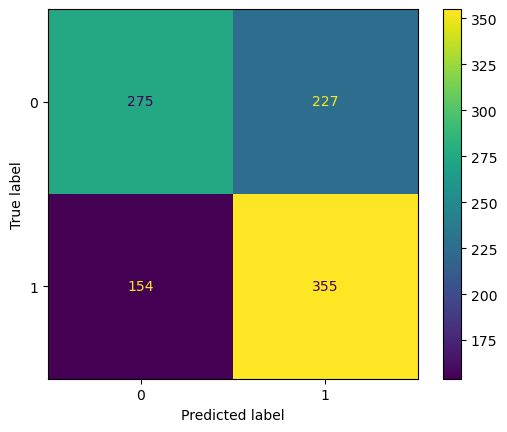


    Accuracy:0.6231454005934718
    Precision:0.6974459724950884
    Recall:0.6099656357388317
    F1:0.6507791017415215



In [261]:
cm_display_nb = ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred))
cm_display_nb.plot()
plt.show()

print(f'''
    Accuracy:{accuracy_score(y_pred, y_test)}
    Precision:{precision_score(y_pred, y_test)}
    Recall:{recall_score(y_pred, y_test)}
    F1:{f1_score(y_pred, y_test)}
'''
)

# Unsupervised Learning

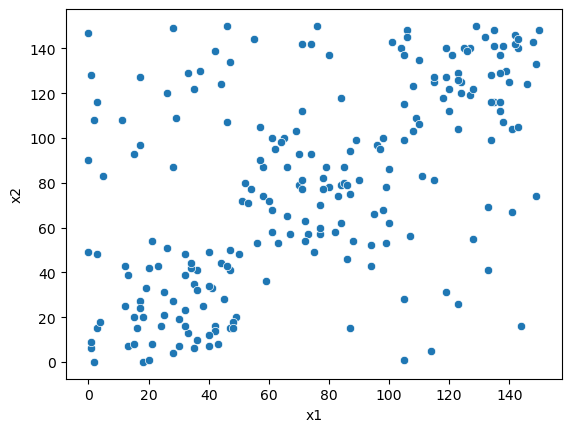

In [292]:
df1 = pd.DataFrame()
df2 = pd.DataFrame()
df3 = pd.DataFrame()
df4 = pd.DataFrame()

for i in ['x1', 'x2']:
    df1[i] = np.random.randint(0,51,50)
    df2[i] = np.random.randint(51,101,50)
    df3[i] = np.random.randint(101,151,50)
    df4[i] = np.random.randint(0,151,75)

unsupervised_df = pd.concat([df1, df2, df3, df4])
sns.scatterplot(unsupervised_df, x='x1', y='x2')
plt.show()

## K-means Clustering

In [293]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

results_df = pd.DataFrame()
sil_df = pd.DataFrame()

for i in range(2, 16):
    kmeans = KMeans(n_clusters=i, random_state=0, n_init="auto").fit(unsupervised_df[['x1', 'x2']])
    kmeans.inertia_
    result = [[i, round(kmeans.inertia_,0)]]
    results_df = pd.concat([results_df, pd.DataFrame(result, columns=['n', 'inertia'])])

    sil_result = silhouette_score(unsupervised_df[['x1', 'x2']], kmeans.predict(unsupervised_df[['x1', 'x2']]))
    sil_df = pd.concat([sil_df , pd.DataFrame([[i, sil_result]], columns = ['n', 'sil_score'])])

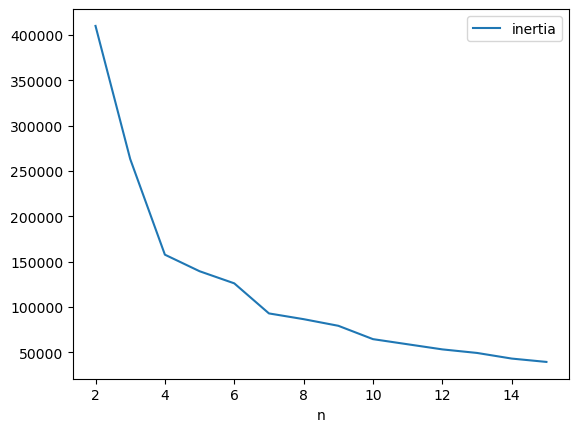

In [294]:
results_df.plot.line(x='n', y='inertia')
plt.show()

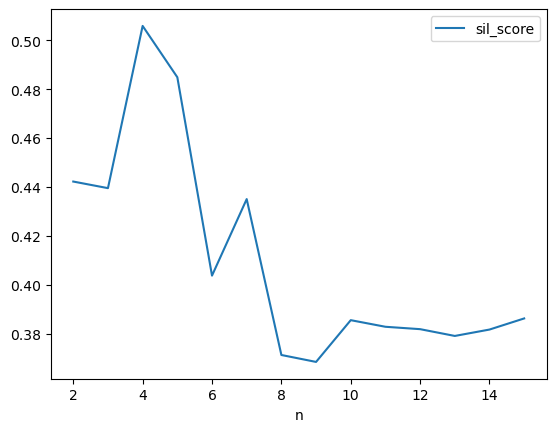

In [295]:
sil_df.plot.line(x='n', y='sil_score')
plt.show()

In [298]:
sil_df.sort_values(by='sil_score')

,n,sil_score
0,9,0.368427
0,8,0.371262
0,13,0.379054
0,14,0.381669
0,12,0.381829
0,11,0.382805
0,10,0.385508
0,15,0.386216
0,6,0.403733
0,7,0.435041


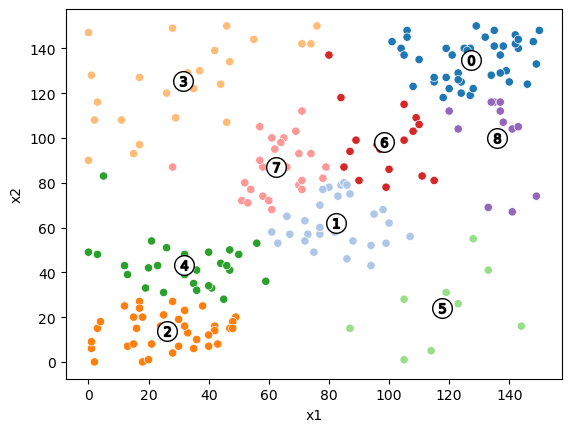

In [ ]:
kmeans = KMeans(n_clusters=9, random_state=0, n_init="auto").fit(unsupervised_df[['x1', 'x2']])

fig,ax = plt.subplots()
g = sns.scatterplot(unsupervised_df, x='x1', y='x2', hue=kmeans.labels_, palette='tab20', legend=False, markers=range(0,10), ax=ax)

centers = kmeans.cluster_centers_

ax.scatter(centers[:,0],centers[:,1],marker='o',c='white',s=200,edgecolor='k')
for i,c in enumerate(centers):
	ax.scatter(c[0],c[1],marker='$%d$'%i,s=50,edgecolor='k')
	
plt.show()